### 정규화 선형회귀
- 정규화 선형회귀방법은 선형회귀 계수에 대한 제약 조건을 추가함으로써 모형이 과도하게 최적화되는 현상, 즉 과적화를 막는 방법이다.
- 라쏘(L1) : 절대값 합
- 릿지(L2) : 제곱 합
- 엘라스닉텟 : L1 + L2




### Lasso 회귀모형(L1)
- Lasso 회귀모형은 가중치의 절대값의 합을 최소화하는 것을 추가적인 제약 조건으로 한다.
- 걊이 0이 될 수 있다.

### Ridge 회귀모형(L2)
- Ridge 회귀모형은 가중치의 제곱 합을 최소화하는 것을 추가적인 제약조건으로 한다.
- 값이 0이 될 수 없다.

### Elastic Net 회귀모형
- 엘라스틱넷 회귀모형은 가중치의 절대값 합과 제고합을 동시에 제약조건으로 가지는 모형이다.


### statsmodels의 정규화 회귀모형
- https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.fit_regularized.html

In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

def make_nonlinear(seed=0):
    np.random.seed(seed)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1
    X = X[:, np.newaxis]
    return (X, y)


X, y = make_nonlinear()
dfX = pd.DataFrame(X, columns=["x"])
dfX = sm.add_constant(dfX)
dfy = pd.DataFrame(y, columns=["y"])
df = pd.concat([dfX, dfy], axis=1)

In [7]:
model = sm.OLS.from_formula(
    "y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9)", data=df)
result1 = model.fit()
result1.params

Intercept       -0.169863
x               25.735773
I(x ** 2)     -428.141684
I(x ** 3)     3866.723115
I(x ** 4)   -18340.939667
I(x ** 5)    49326.072553
I(x ** 6)   -78884.743085
I(x ** 7)    74538.645164
I(x ** 8)   -38453.132196
I(x ** 9)     8350.254987
dtype: float64

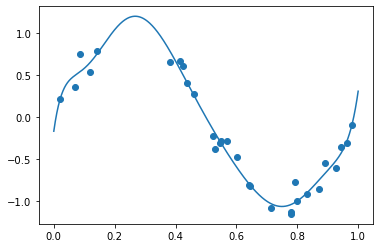

In [9]:
import matplotlib.pyplot as plt
def plot_statsmodels(result):
    plt.scatter(X, y)
    xx = np.linspace(0, 1, 1000)
    dfxx = pd.DataFrame(xx, columns=["x"])
    dfxx = sm.add_constant(dfxx)
    plt.plot(xx, result.predict(dfxx).values)
    plt.show()


plot_statsmodels(result1)

[ 0.63308745 -0.75705866 -1.07056551 -0.76835135 -0.35530367  0.0121939
  0.29917825  0.50969248  0.65793698  0.75851865]


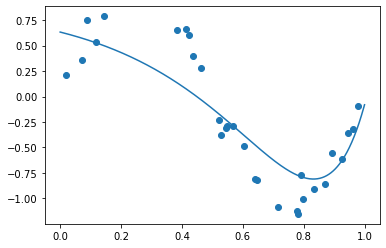

In [10]:
result2 = model.fit_regularized(alpha=0.01, L1_wt=0) # L1 = 0이면 순수한 릿지 모형이다
print(result2.params)
plot_statsmodels(result2)

Intercept    0.687949
x           -1.129134
I(x ** 2)   -1.124878
I(x ** 3)    0.000000
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.000000
I(x ** 8)    0.281484
I(x ** 9)    1.075281
dtype: float64


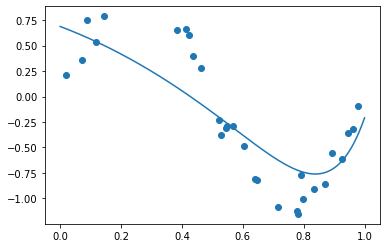

In [11]:
result3 = model.fit_regularized(alpha=0.01, L1_wt=1) # L1 = 1이면 순수한 라쏘 모형이다.
print(result3.params)
plot_statsmodels(result3)

Intercept    0.656203
x           -0.849745
I(x ** 2)   -1.262902
I(x ** 3)   -0.425687
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.304049
I(x ** 8)    0.631908
I(x ** 9)    0.801206
dtype: float64


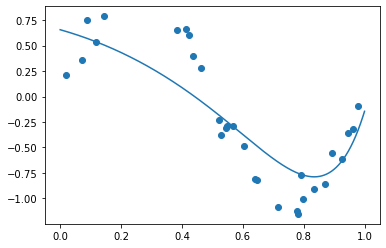

In [12]:
result4 = model.fit_regularized(alpha=0.01, L1_wt=0.5) # L1_wt가 0과 1사이면 엘라스틱넷 모형이다
print(result4.params)
plot_statsmodels(result4)